<a href="https://colab.research.google.com/github/n-cai/Statistics/blob/main/CNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Convolutional Neural Networks (CNN) for MNIST Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

First, import the required libraries:

In [ ]:
import tensorflow as tf
print(tf.__version__)
import time
import numpy as np
import pandas as pd
from numpy import unique, argmax
from keras.utils import np_utils
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

2.8.0


Then, We load the MNIST Dataset using the Keras library and split it into training and testing sets.

In [ ]:
#loading the MNIST Dataset

(train_x, train_y), (test_x, test_y) = mnist.load_data()

num_classes = len(np.unique(train_y))

11501568/11490434 [==============================] - 0s 0us/step


Now, let's print the dimensions of the dataset:

In [ ]:
#printing the shapes

print(train_x.shape, train_y.shape)
print(test_x.shape , test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Note that we have 60,000 images in the train set and 10,000 images in the test set. Now, we reshape the datasets since the images are greyscaled:

In [ ]:
#reshaping train and test sets:

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1))
test_x = test_x .reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))

Now, let's print the new dimensions:

In [ ]:
#printing the shapes

print(train_x.shape, train_y.shape)
print(test_x.shape , test_y.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


Now, we perform normalization for scaling the image pixels. This will help improve the model's performance because the value will range from 0 to 1 instead of 0 to 255.  

In [ ]:
#normalizing the pixel values of images

train_x = train_x.astype('float32')/255.0
test_x = test_x.astype('float32')/255.0

#convert class labels to binary class labels

train_labels = np_utils.to_categorical(train_y, num_classes)
test_labels = np_utils.to_categorical(test_y, num_classes)

Now, let's plot the first 20 images for better visualization:

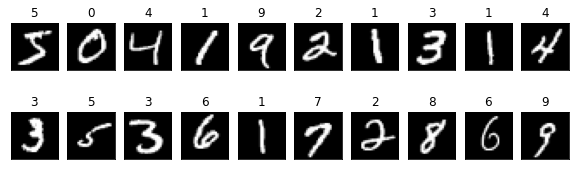

In [ ]:
#plotting images of dataset

fig = plt.figure(figsize = (10,3))

for i in range(20):
    ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_x[i]), cmap='gray')
    ax.set_title(train_y[i])

Let's try to print the shape of a single image:

In [ ]:
shape = train_x.shape[1:]

shape

(28, 28, 1)

Here, 1 indicates the channel of the image.

Function to plot model accuracy and loss:

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### **Model 1:**

Now, let's build a simple CNN model:

In [ ]:
#A simple CNN Model

model1 = Sequential()

#adding convolutional layer

model1.add(Conv2D(32, (3,3), activation='relu', input_shape= shape))

model1.add(MaxPool2D((2,2)))

model1.add(Flatten())

model1.add(Dense(10, activation='softmax'))

Let's print a summary of our model for better understanding:

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


Now let's compile the model:

In [ ]:
#compiling model

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'] )

And then train the model:

In [ ]:
#training the model:

start = time.time()

x1 = model1.fit(train_x, train_y, epochs=50, batch_size = 64, validation_split=0.2)

end = time.time()

Epoch 1/50
750/750 [==============================] - 22s 29ms/step - loss: 0.3120 - accuracy: 0.9122 - val_loss: 0.1396 - val_accuracy: 0.9629
Epoch 2/50
750/750 [==============================] - 21s 28ms/step - loss: 0.1164 - accuracy: 0.9666 - val_loss: 0.1039 - val_accuracy: 0.9695
Epoch 3/50
750/750 [==============================] - 21s 28ms/step - loss: 0.0830 - accuracy: 0.9761 - val_loss: 0.0889 - val_accuracy: 0.9736
Epoch 4/50
750/750 [==============================] - 21s 28ms/step - loss: 0.0676 - accuracy: 0.9799 - val_loss: 0.0730 - val_accuracy: 0.9796
Epoch 5/50
750/750 [==============================] - 21s 28ms/step - loss: 0.0579 - accuracy: 0.9831 - val_loss: 0.0716 - val_accuracy: 0.9808
Epoch 6/50
750/750 [==============================] - 21s 28ms/step - loss: 0.0510 - accuracy: 0.9849 - val_loss: 0.0730 - val_accuracy: 0.9788
Epoch 7/50
750/750 [==============================] - 21s 28ms/step - loss: 0.0452 - accuracy: 0.9864 - val_loss: 0.0677 - val_accuracy:

Now, we plot the training performance:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


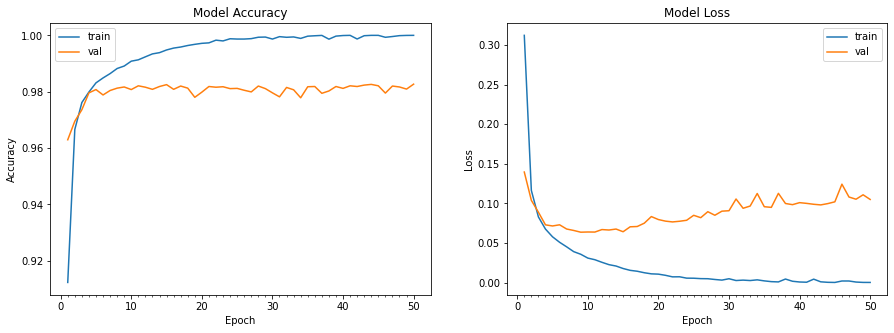

Model 1 took 1042.70 seconds to train
313/313 [==============================] - 2s 7ms/step - loss: 0.0984 - accuracy: 0.9833
Accuracy on test data is: 0.98


In [ ]:
#plot model history

plot_model_history(x1)

print("Model 1 took %0.2f seconds to train"%(end - start))
# compute test accuracy
loss, accuracy= model1.evaluate(test_x, test_y)
print("Accuracy on test data is: %0.2f"%accuracy)

**Question 1:** What is the issue with this and what should we do?

### **Model 2**

Increase the network depth by adding multiple layers:

In [ ]:
# Define the model
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape= shape))

model2.add(Conv2D(32, (3, 3), activation='relu'))

model2.add(MaxPool2D((2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))

model2.add(Dense(num_classes, activation='softmax'))

Let's print a summary of our model for better understanding:

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               589952    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                      

Now let's compile the model and train it:

In [ ]:
#compiling model

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'] )

#training the model:

start = time.time()

x2 = model2.fit(train_x, train_y, epochs=20, batch_size = 128, validation_split=0.2)

end = time.time()

Epoch 1/20
375/375 [==============================] - 55s 145ms/step - loss: 0.2029 - accuracy: 0.9397 - val_loss: 0.0716 - val_accuracy: 0.9798
Epoch 2/20
375/375 [==============================] - 58s 155ms/step - loss: 0.0548 - accuracy: 0.9830 - val_loss: 0.0496 - val_accuracy: 0.9850
Epoch 3/20
375/375 [==============================] - 55s 147ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0648 - val_accuracy: 0.9812
Epoch 4/20
375/375 [==============================] - 54s 144ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0450 - val_accuracy: 0.9871
Epoch 5/20
375/375 [==============================] - 53s 142ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0432 - val_accuracy: 0.9877
Epoch 6/20
375/375 [==============================] - 54s 143ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0481 - val_accuracy: 0.9883
Epoch 7/20
375/375 [==============================] - 54s 143ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0514 - val_ac

Plot the training performance:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


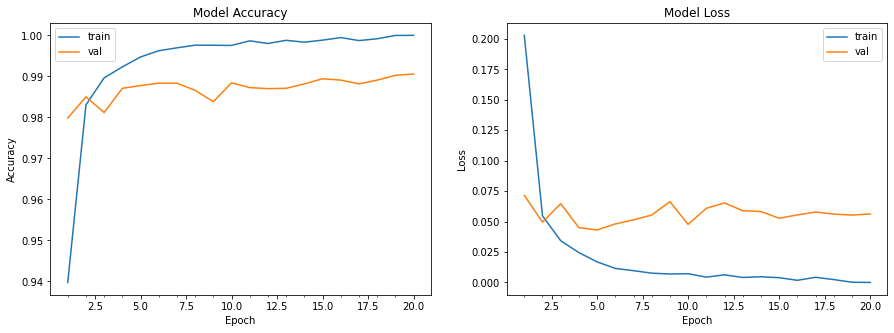

Model 2 took 1088.74 seconds to train
313/313 [==============================] - 4s 12ms/step - loss: 0.0450 - accuracy: 0.9918
Accuracy on test data is: 0.99


In [ ]:
#plot model history

plot_model_history(x2)

print("Model 2 took %0.2f seconds to train"%(end - start))
# compute test accuracy
loss, accuracy= model2.evaluate(test_x, test_y)
print("Accuracy on test data is: %0.2f"%accuracy)

**Question 2:** What are the best learning rate, loss function, iteration number (epochs), and batch_size for this model?